In [9]:
# KPI
import pandas as pd
df = pd.read_csv(r"C:/Users/Lorenzo/Desktop/Training_py/retail_sales_cleaned.csv")

# 1. Ricavi totali
ricavi_totali = df['Total Amount'].sum()
print("Ricavi totali:", ricavi_totali)
# 2. totale transazioni
Transazioni_totali = df['Transaction ID'].nunique()
print("Totale transazioni:", Transazioni_totali)
Quantita_totale = df['Quantity'].sum()
print("Quantità totale venduta:", Quantita_totale)
# 3. Prezzo medio per transazione
prezzo_medio = df['Total Amount'].mean()
print("Prezzo medio per transazione:", prezzo_medio)


Ricavi totali: 456000
Totale transazioni: 1000
Quantità totale venduta: 2514
Prezzo medio per transazione: 456.0


    year  month  Total Amount
0   2023      1         35450
1   2023      2         44060
2   2023      3         28990
3   2023      4         33870
4   2023      5         53150
5   2023      6         36715
6   2023      7         35465
7   2023      8         36960
8   2023      9         23620
9   2023     10         46580
10  2023     11         34920
11  2023     12         44690
12  2024      1          1530


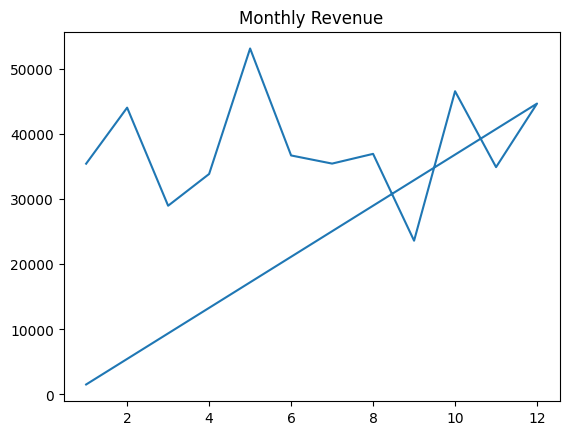

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Vendite nel tempi
vendite_mensili = df.groupby(['year', 'month'])['Total Amount'].sum().reset_index() 
print(vendite_mensili)

plt.figure()
plt.plot(vendite_mensili['month'], vendite_mensili['Total Amount'])
plt.title('Monthly Revenue')
plt.show()

In [11]:
#Vendite per categoria
sales_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
sales_by_category

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

In [12]:
#Vendite per cliente
revenue_per_customer = df.groupby('Customer ID')['Total Amount'].sum()
revenue_per_customer.describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

In [13]:
# Vendite per genere
df.groupby('Gender')['Total Amount'].sum()
perc_man = df[df['Gender'] == 'Male']['Total Amount'].sum() / df['Total Amount'].sum() * 100
print(f"Percentuale di vendite ai clienti di genere maschile: {perc_man:.2f}%")

Percentuale di vendite ai clienti di genere maschile: 48.94%


In [14]:
# Vendite per fascia d'età
bins = [18,25,35,50,65] # definisce i bordi delle fasce d'età
labels = ['18-25','26-35','36-50','50+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels) #cut assegna ogni cliente a una fascia d'età in base alla colonna 'Age'
df.groupby('age_group')['Total Amount'].sum()

age_group
18-25     73335
26-35     98480
36-50    139660
50+      133310
Name: Total Amount, dtype: int64

In [15]:
#DIstribuzione vendite nella settimana
df.groupby('day_of_week')['Total Amount'].sum().sort_values()

day_of_week
Thursday     53835
Sunday       58600
Wednesday    58770
Friday       66290
Tuesday      69440
Monday       70250
Saturday     78815
Name: Total Amount, dtype: int64

  fascia_spesa  numero_clienti  totale_speso  percentuale_clienti  \
0        0-100             457         29240                 45.7   
1      101-250             147         23860                 14.7   
2      251-500              97         39300                  9.7   
3     501-1000             146        125800                 14.6   
4    1001-2000             153        237800                 15.3   

   percentuale_valore_totale  
0                   6.412281  
1                   5.232456  
2                   8.618421  
3                  27.587719  
4                  52.149123  


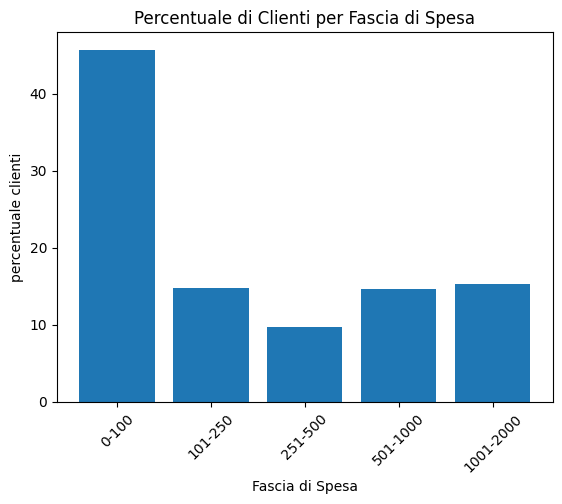

Text(0.5, 1.0, 'Percentuale del Valore Totale per Fascia di Spesa')

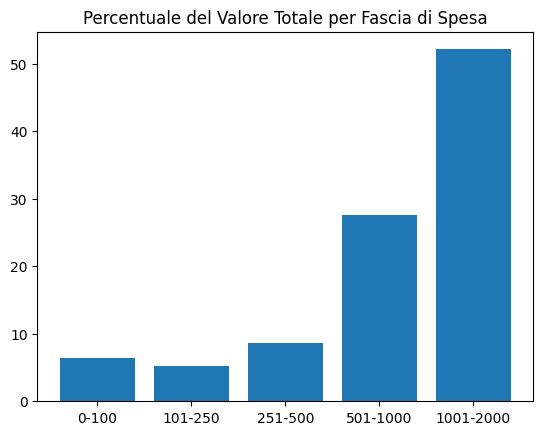

In [16]:
import pandas as pd
import numpy as np

# Fasce d'età
bins = [0, 100, 250, 500, 1000, 2000, np.inf]
labels = ['0-100', '101-250', '251-500', '501-1000', '1001-2000', '2000+']

# Colonna delle fasce
df['fascia_spesa'] = pd.cut(df['Total Amount'], bins=bins, labels=labels)

# Analisi della concentrazione
analisi = df.groupby('fascia_spesa').agg(
    numero_clienti=('Total Amount', 'count'),
    totale_speso=('Total Amount', 'sum')
).reset_index()

# Percentuali
analisi['percentuale_clienti'] = (analisi['numero_clienti'] / analisi['numero_clienti'].sum()) * 100
analisi['percentuale_valore_totale'] = (analisi['totale_speso'] / analisi['totale_speso'].sum()) * 100

#Plot
print(analisi)
plt.figure()
plt.bar(analisi['fascia_spesa'], analisi['percentuale_clienti'])
plt.title('Percentuale di Clienti per Fascia di Spesa')
plt.xlabel('Fascia di Spesa')
plt.ylabel('percentuale clienti')
plt.xticks(rotation=45)
plt.show()

plt.figure()
plt.bar(analisi['fascia_spesa'], analisi['percentuale_valore_totale'])
plt.title('Percentuale del Valore Totale per Fascia di Spesa')

In [ ]:
# Calcolo della variazione percentuale mese su mese
vendite_mensili = df.groupby(['year', 'month'])['Total Amount'].sum().reset_index()
print(vendite_mensili)
df_vendite_mensili = vendite_mensili.copy()
df_vendite_mensili['mo_m_growth'] = df_vendite_mensili['Total Amount'].pct_change()

# Calcolo della volatilità
volatilita_mensile = df_vendite_mensili['mo_m_growth'].std()

print(f"La volatilità media mensile è del: {volatilita_mensile}")


    year  month  Total Amount
0   2023      1         35450
1   2023      2         44060
2   2023      3         28990
3   2023      4         33870
4   2023      5         53150
5   2023      6         36715
6   2023      7         35465
7   2023      8         36960
8   2023      9         23620
9   2023     10         46580
10  2023     11         34920
11  2023     12         44690
12  2024      1          1530
La volatilità media mensile è del: 0.5023298885327218


INSIGHT
- il 45% del volume dei clienti si collocano nella fascia di spesa più bassa.
- il 52% del valore della spesa però è concentrato nella fascia alto-spendente.
- la spesa è concentrata maggiormente nella fascia d'età 36-50 e prevalentemente nel settore elettronico; non si registrano differenze rilevanti per genere.
- La distribuzione nel tempo mostra un'alta volatilità (0,5) con forti shock nel breve periodo. L'andamento è atipico e non segue gli eventi di calendario (black friday, rally natalizio); servirebbero serie storiche per capire se la stagionalità normalizza i dati o se vi sono specifci eventi esogeni.
- Si riscontra inifine una marcata ciclicità settimanale con il picco massimo il sabato (€78.8k) e il minimo il giovedì (€53.8k), evidenziando una concentrazione degli acquisti nel weekend e una forte ripresa a inizio settimana.